In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re

In [49]:
# Load the Excel file
data_path = '/content/drive/MyDrive/scholarlink_nlp/university_data.xlsx'  # Update with the path to your file on Google Drive

# Load the data for students and professors
students_data = pd.read_excel(data_path, sheet_name='Students')
professors_data = pd.read_excel(data_path, sheet_name='Professors')

In [50]:
# Display the first few rows to confirm correct loading and check the data structure
print("Students Data:")
print(students_data.head())


Students Data:
                           Student GUID             Name  \
0  c1c5fc27-048a-4fad-b32a-57b6613f5c6d      Daniel Cain   
1  ead3d7a5-bddc-4ad1-ab55-4db006731802       Amy Potter   
2  c6f1e6d1-21fe-4daa-a022-ff9e0f4fd957  Jessica Collins   
3  3e19f76f-46b4-46c4-a489-36053fd8d79e      Maria Singh   
4  31bbb063-8dae-4e81-97c4-456e8df9af33     James Thomas   

                                  Research Interests University Field  
0  Photonics, Cosmology, Theoretical Physics, Exp...          Physics  
1  Cognitive Psychology, Developmental Psychology...       Psychology  
2  Materials Science, Physical Chemistry, Inorgan...        Chemistry  
3  Economic History, History of Science, Military...          History  
4  Geometry, Mathematical Physics, Statistics, Al...      Mathematics  


In [51]:
print(students_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student GUID        10000 non-null  object
 1   Name                10000 non-null  object
 2   Research Interests  10000 non-null  object
 3   University Field    10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB
None


In [52]:
print("\nProfessors Data:")
print(professors_data.head())


Professors Data:
                         Professor GUID             Name  \
0  ee1d5410-3fd8-444e-b847-b6d7b41137fc      Thomas Hill   
1  44560b3d-0f89-4cc1-85a7-a660f5cd7ae6    Dwayne Branch   
2  2dcd859c-9c81-40f8-a2df-89471cfa3e85  Heather Swanson   
3  f335bcda-e4de-4d10-9c68-f76bbd0e6968    Thomas Ashley   
4  de9922e1-a6a9-4f05-84ba-1ee651398ced  Pamela Mcmillan   

                                  Research Interests University Field  
0  Astrophysics, Particle Physics, Statistical Me...          Physics  
1  Biopsychology, Social Psychology, Psychometric...       Psychology  
2  Forensic Psychology, Clinical Psychology, Deve...       Psychology  
3  Statistics, Probability, Topology, Mathematica...      Mathematics  
4  Environmental Engineering, Systems Engineering...      Engineering  


In [53]:
print(professors_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Professor GUID      10000 non-null  object
 1   Name                10000 non-null  object
 2   Research Interests  10000 non-null  object
 3   University Field    10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB
None


In [54]:
professors_data.isna().sum()

Professor GUID        0
Name                  0
Research Interests    0
University Field      0
dtype: int64

In [55]:
students_data.isna().sum()

Student GUID          0
Name                  0
Research Interests    0
University Field      0
dtype: int64

In [56]:
# Get all unique university fields from both datasets
unique_student_fields = students_data['University Field'].unique()
unique_professor_fields = professors_data['University Field'].unique()

In [57]:
# Data Cleaning and Preprocessing
def clean_data(df):
    # Trim whitespace
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Convert to lowercase for consistency
    df['Research Interests'] = df['Research Interests'].str.lower()
    df['University Field'] = df['University Field'].str.lower()

    # Remove duplicates based on the GUID column
    df = df.drop_duplicates(subset=[df.columns[0]])

    return df

# Applying the cleaning function to both dataframes
students_data = clean_data(students_data)
professors_data = clean_data(professors_data)

In [58]:
students_data.head()

,Student GUID,Name,Research Interests,University Field
0,c1c5fc27-048a-4fad-b32a-57b6613f5c6d,Daniel Cain,"photonics, cosmology, theoretical physics, exp...",physics
1,ead3d7a5-bddc-4ad1-ab55-4db006731802,Amy Potter,"cognitive psychology, developmental psychology...",psychology
2,c6f1e6d1-21fe-4daa-a022-ff9e0f4fd957,Jessica Collins,"materials science, physical chemistry, inorgan...",chemistry
3,3e19f76f-46b4-46c4-a489-36053fd8d79e,Maria Singh,"economic history, history of science, military...",history
4,31bbb063-8dae-4e81-97c4-456e8df9af33,James Thomas,"geometry, mathematical physics, statistics, al...",mathematics


In [59]:
# EDA - Performing basic checks
def perform_eda(df):
    # Check for missing values
    print("Missing values:")
    print(df.isnull().sum())

    # Check for data types
    print("\nData types:")
    print(df.dtypes)

    # Combine and deduplicate the fields
    valid_fields = list(set(unique_student_fields) | set(unique_professor_fields))
    valid_fields = [x.lower() for x in valid_fields]
    print("\nInvalid 'University Field' entries:")
    print(df[~df['University Field'].isin(valid_fields)])

# Perform EDA on both dataframes
print("EDA for Students Data:")
perform_eda(students_data)
print("\nEDA for Professors Data:")
perform_eda(professors_data)

EDA for Students Data:
Missing values:
Student GUID          0
Name                  0
Research Interests    0
University Field      0
dtype: int64

Data types:
Student GUID          object
Name                  object
Research Interests    object
University Field      object
dtype: object

Invalid 'University Field' entries:
Empty DataFrame
Columns: [Student GUID, Name, Research Interests, University Field]
Index: []

EDA for Professors Data:
Missing values:
Professor GUID        0
Name                  0
Research Interests    0
University Field      0
dtype: int64

Data types:
Professor GUID        object
Name                  object
Research Interests    object
University Field      object
dtype: object

Invalid 'University Field' entries:
Empty DataFrame
Columns: [Professor GUID, Name, Research Interests, University Field]
Index: []


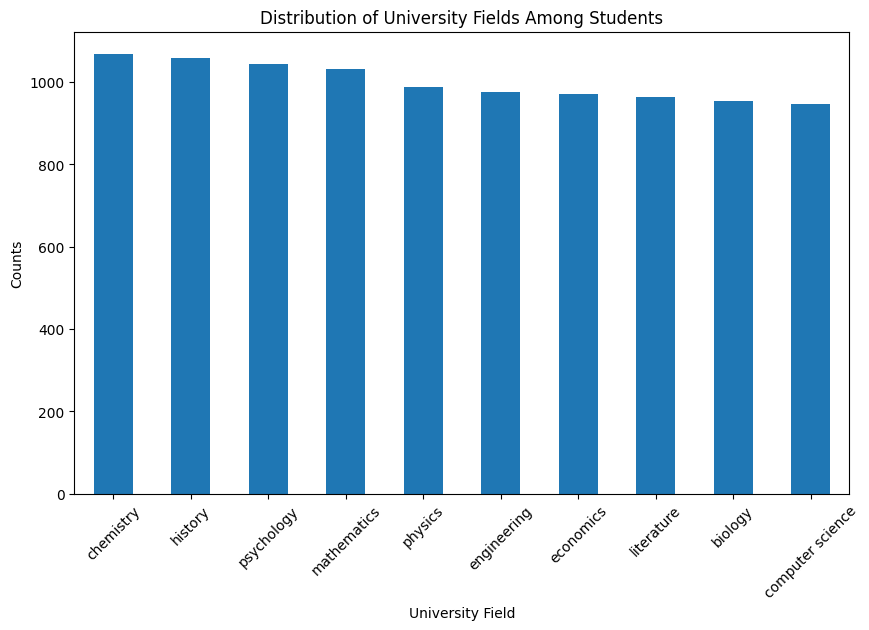

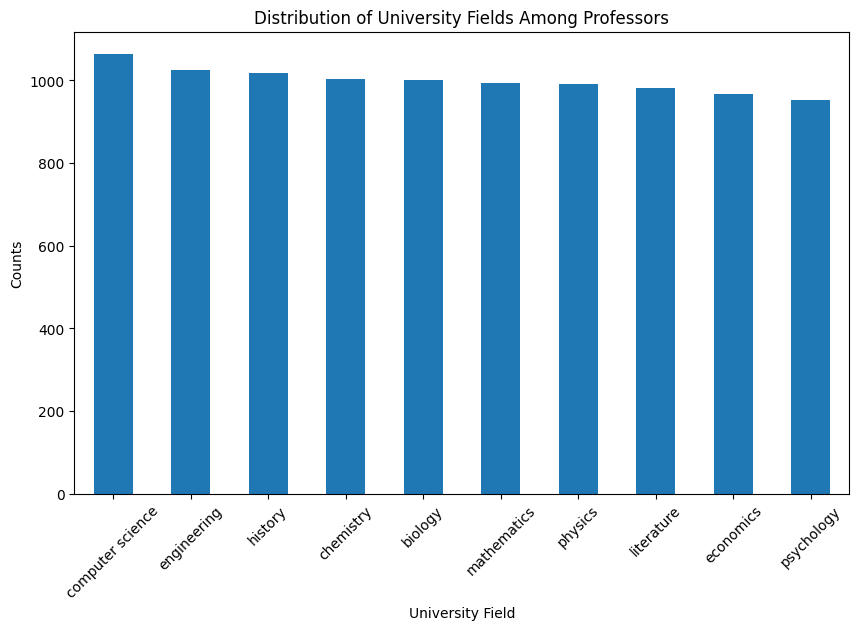

In [60]:
# Distribution of University Fields for Students and Professors
def plot_university_field_distribution(df, title):
    field_counts = df['University Field'].value_counts()
    plt.figure(figsize=(10,6))
    field_counts.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Counts')
    plt.xlabel('University Field')
    plt.xticks(rotation=45)
    plt.show()

plot_university_field_distribution(students_data, 'Distribution of University Fields Among Students')
plot_university_field_distribution(professors_data, 'Distribution of University Fields Among Professors')



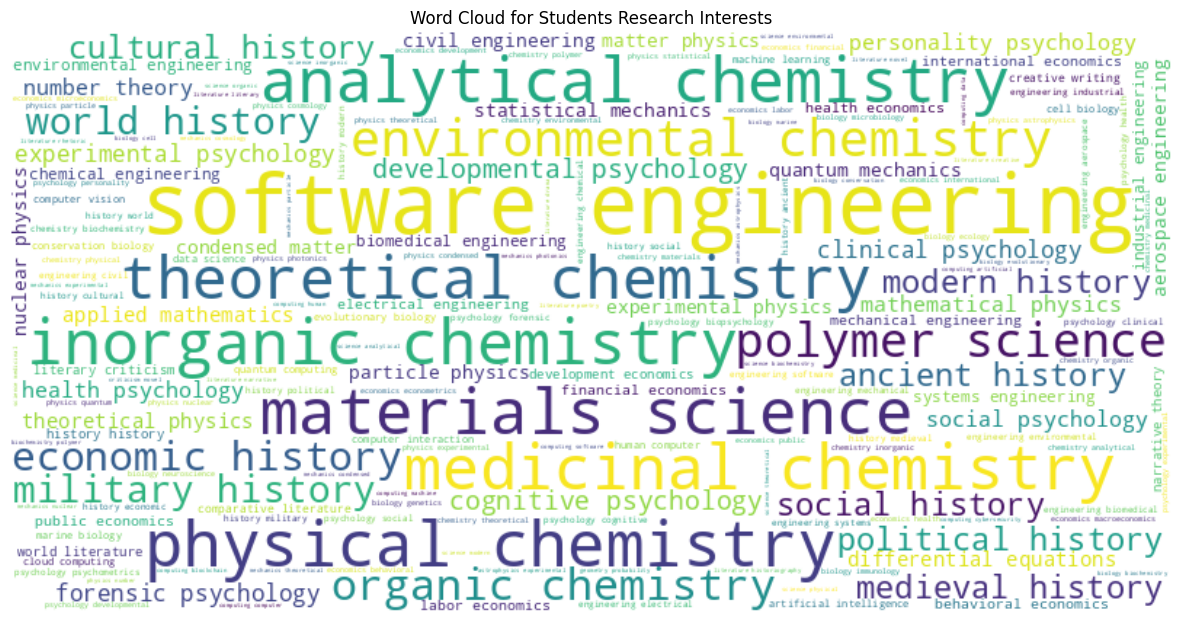

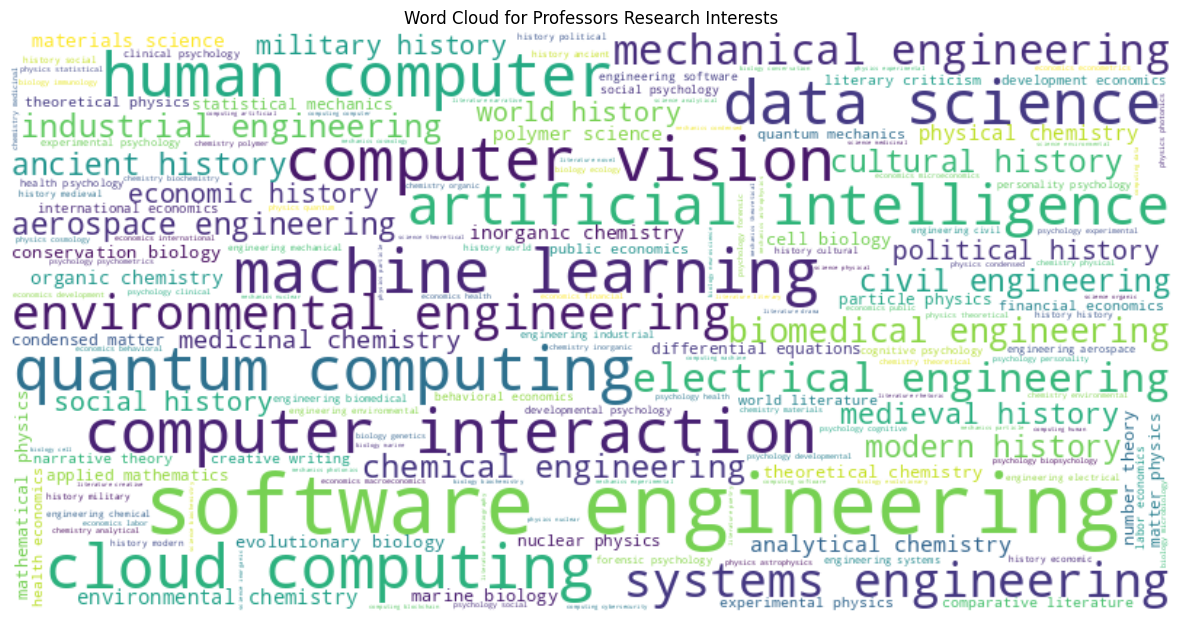

In [61]:
# Function to plot a word cloud for the 'Research Interests' column
def plot_wordcloud(df, title):
    text = ' '.join(df['Research Interests'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_wordcloud(students_data, 'Word Cloud for Students Research Interests')
plot_wordcloud(professors_data, 'Word Cloud for Professors Research Interests')



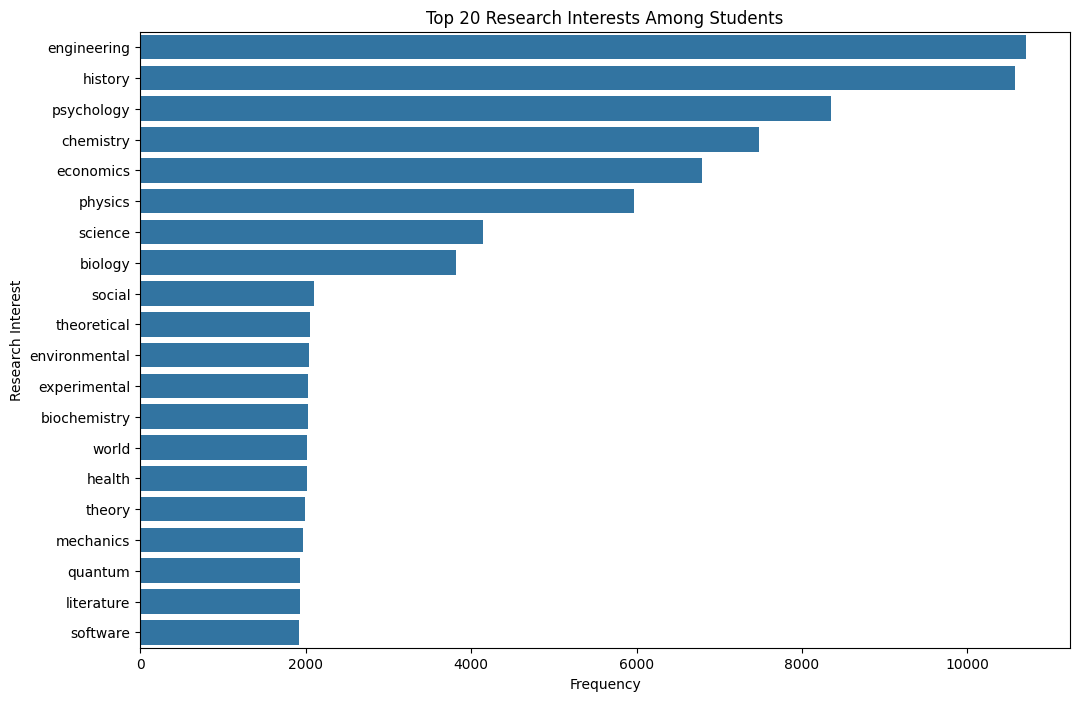

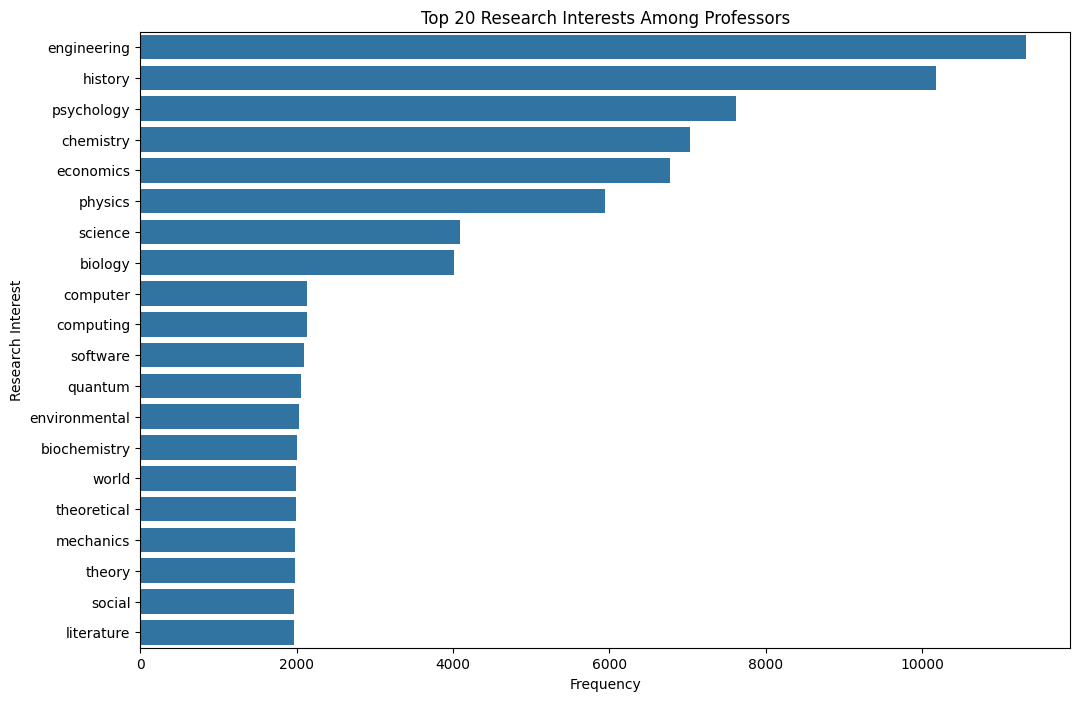

In [62]:
# Visualizing the top N Research Interests
def plot_top_n_research_interests(df, title, n=20):
    vectorizer = CountVectorizer(stop_words='english')
    interests_counts = vectorizer.fit_transform(df['Research Interests'])
    sum_interests = interests_counts.sum(axis=0)
    words_freq = [(word, sum_interests[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]

    # Create a DataFrame for plotting
    top_n_df = pd.DataFrame(top_n_words, columns=['Research Interest', 'Frequency'])

    # Plot
    plt.figure(figsize=(12,8))
    sns.barplot(x='Frequency', y='Research Interest', data=top_n_df)
    plt.title(title)
    plt.show()

plot_top_n_research_interests(students_data, 'Top 20 Research Interests Among Students')
plot_top_n_research_interests(professors_data, 'Top 20 Research Interests Among Professors')

In [63]:
# Download required packages for NLP
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# NLP Preprocessing
def preprocess_text(text):
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

In [65]:
# Apply NLP preprocessing to 'Research Interests'
students_data['Processed Interests'] = students_data['Research Interests'].apply(preprocess_text)
professors_data['Processed Interests'] = professors_data['Research Interests'].apply(preprocess_text)


In [66]:
# Vectorization using TF-IDF
'''tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the combined set of interests
combined_interests = pd.concat([students_data['Processed Interests'], professors_data['Processed Interests']])
tfidf_vectorizer.fit(combined_interests)

# Transform the interests to TF-IDF vectors
students_tfidf_matrix = tfidf_vectorizer.transform(students_data['Processed Interests'])
professors_tfidf_matrix = tfidf_vectorizer.transform(professors_data['Processed Interests'])'''


"tfidf_vectorizer = TfidfVectorizer()\n\n# Fit the vectorizer on the combined set of interests\ncombined_interests = pd.concat([students_data['Processed Interests'], professors_data['Processed Interests']])\ntfidf_vectorizer.fit(combined_interests)\n\n# Transform the interests to TF-IDF vectors\nstudents_tfidf_matrix = tfidf_vectorizer.transform(students_data['Processed Interests'])\nprofessors_tfidf_matrix = tfidf_vectorizer.transform(professors_data['Processed Interests'])"

In [67]:
'''# Recommendation functions
def recommend_professors_to_student(student_index, top_n=5):
    student_vector = students_tfidf_matrix[student_index]
    similarity_scores = cosine_similarity(student_vector, professors_tfidf_matrix)
    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]
    recommendations = professors_data.iloc[top_indices]
    return recommendations[['Professor GUID', 'Name', 'Research Interests', 'University Field']]

def recommend_students_to_professor(professor_index, top_n=5):
    professor_vector = professors_tfidf_matrix[professor_index]
    similarity_scores = cosine_similarity(professor_vector, students_tfidf_matrix)
    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]
    recommendations = students_data.iloc[top_indices]
    return recommendations[['Student GUID', 'Name', 'Research Interests', 'University Field']]

# Applying the recommendation functions for each student and professor
students_recommendations = {}
for i in range(len(students_data)):
    students_recommendations[students_data.iloc[i]['Student GUID']] = recommend_professors_to_student(i).to_dict('records')

professors_recommendations = {}
for i in range(len(professors_data)):
    professors_recommendations[professors_data.iloc[i]['Professor GUID']] = recommend_students_to_professor(i).to_dict('records')'''


"# Recommendation functions\ndef recommend_professors_to_student(student_index, top_n=5):\n    student_vector = students_tfidf_matrix[student_index]\n    similarity_scores = cosine_similarity(student_vector, professors_tfidf_matrix)\n    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]\n    recommendations = professors_data.iloc[top_indices]\n    return recommendations[['Professor GUID', 'Name', 'Research Interests', 'University Field']]\n\ndef recommend_students_to_professor(professor_index, top_n=5):\n    professor_vector = professors_tfidf_matrix[professor_index]\n    similarity_scores = cosine_similarity(professor_vector, students_tfidf_matrix)\n    top_indices = similarity_scores.argsort()[0][-top_n:][::-1]\n    recommendations = students_data.iloc[top_indices]\n    return recommendations[['Student GUID', 'Name', 'Research Interests', 'University Field']]\n\n# Applying the recommendation functions for each student and professor\nstudents_recommendations = {}\nfor i in r

In [68]:
'''student_guid_to_query = 'c1c5fc27-048a-4fad-b32a-57b6613f5c6d'
student_recommendations = students_recommendations.get(student_guid_to_query)'''


"student_guid_to_query = 'c1c5fc27-048a-4fad-b32a-57b6613f5c6d'\nstudent_recommendations = students_recommendations.get(student_guid_to_query)"

In [69]:
'''student_recommendations'''

'student_recommendations'

In [70]:
'''# Convert the list of dictionaries to a DataFrame for a table-like display
recommendations_df = pd.DataFrame(student_recommendations)

# Display the DataFrame
recommendations_df'''

'# Convert the list of dictionaries to a DataFrame for a table-like display\nrecommendations_df = pd.DataFrame(student_recommendations)\n\n# Display the DataFrame\nrecommendations_df'

In [71]:
'''professor_guid_to_query = 'f335bcda-e4de-4d10-9c68-f76bbd0e6968'
professor_recommendations = professors_recommendations.get(professor_guid_to_query)'''

"professor_guid_to_query = 'f335bcda-e4de-4d10-9c68-f76bbd0e6968'\nprofessor_recommendations = professors_recommendations.get(professor_guid_to_query)"

In [72]:
'''professor_recommendations'''

'professor_recommendations'

In [73]:
# Combining 'University Field' with 'Research Interests'
students_data['Combined Interests'] = students_data['University Field'] + " " + students_data['Research Interests']
professors_data['Combined Interests'] = professors_data['University Field'] + " " + professors_data['Research Interests']

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
combined_interests = pd.concat([students_data['Combined Interests'], professors_data['Combined Interests']])
tfidf_vectorizer.fit(combined_interests)
students_tfidf_matrix = tfidf_vectorizer.transform(students_data['Combined Interests'])
professors_tfidf_matrix = tfidf_vectorizer.transform(professors_data['Combined Interests'])

# Cosine similarity calculation
def calculate_similarity(students_tfidf_matrix, professors_tfidf_matrix):
    return cosine_similarity(students_tfidf_matrix, professors_tfidf_matrix)

similarity_matrix = calculate_similarity(students_tfidf_matrix, professors_tfidf_matrix)

# Making recommendations
def recommend_professors_to_student(student_index, top_n=5):
    similarity_scores = similarity_matrix[student_index]
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    return professors_data.iloc[top_indices][['Professor GUID', 'Name', 'Research Interests', 'University Field']]

def recommend_students_to_professor(professor_index, top_n=5):
    similarity_scores = similarity_matrix[:, professor_index]
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    return students_data.iloc[top_indices][['Student GUID', 'Name', 'Research Interests', 'University Field']]



                            Professor GUID             Name  \
0     ee1d5410-3fd8-444e-b847-b6d7b41137fc      Thomas Hill   
2202  c61ebbee-6ae7-4054-ad26-b6c8d9a43d7a  Jennifer Gibson   
8710  10a6b973-6ef8-477c-b96e-7afcec2f7305   Autumn Perkins   
7033  d9099a12-d7d2-42b2-8ef7-98171f7e2eac   Angela Gilmore   
5115  3db1a10a-b06e-4553-ae54-6c2539b6d072      Erin Bishop   

                                     Research Interests University Field  
0     astrophysics, particle physics, statistical me...          physics  
2202  particle physics, photonics, statistical mecha...          physics  
8710  cosmology, condensed matter physics, photonics...          physics  
7033  particle physics, condensed matter physics, st...          physics  
5115  nuclear physics, particle physics, astrophysic...          physics  
                              Student GUID                Name  \
0     c1c5fc27-048a-4fad-b32a-57b6613f5c6d         Daniel Cain   
1857  ccbae9b4-e706-4394-82c7-b205a8037

In [77]:
# Example usage
student_index = 3  # Index of the student in the dataframe
recommended_professors = recommend_professors_to_student(student_index)
print(recommended_professors)

professor_index = 0  # Index of the professor in the dataframe
recommended_students = recommend_students_to_professor(professor_index)
print(recommended_students)

                            Professor GUID                Name  \
7813  a22cef09-ba8b-41e4-ac2b-20b2fa340f81  Christopher Medina   
4648  a41861ae-c679-4673-9e2b-5b1aa7fb9cde     Patricia Porter   
4646  de20de99-170f-43f5-a7d8-5c1b1c70617c         Debra Lloyd   
5933  5b502ee5-88cd-4cd1-94c8-136e58ed9bbe      Kenneth Murphy   
4637  b5dc4d55-e044-4329-88b2-9f898ad6af49       Michael Noble   

                                     Research Interests University Field  
7813  cultural history, economic history, history of...          history  
4648  political history, medieval history, world his...          history  
4646  history of science, cultural history, military...          history  
5933  social history, history of science, military h...          history  
4637  social history, political history, economic hi...          history  
                              Student GUID                Name  \
0     c1c5fc27-048a-4fad-b32a-57b6613f5c6d         Daniel Cain   
1857  ccbae9b4-e706-4

In [78]:
recommendations_df_prof = pd.DataFrame(recommended_professors)

# Display the DataFrame
recommendations_df_prof

,Professor GUID,Name,Research Interests,University Field
7813,a22cef09-ba8b-41e4-ac2b-20b2fa340f81,Christopher Medina,"cultural history, economic history, history of...",history
4648,a41861ae-c679-4673-9e2b-5b1aa7fb9cde,Patricia Porter,"political history, medieval history, world his...",history
4646,de20de99-170f-43f5-a7d8-5c1b1c70617c,Debra Lloyd,"history of science, cultural history, military...",history
5933,5b502ee5-88cd-4cd1-94c8-136e58ed9bbe,Kenneth Murphy,"social history, history of science, military h...",history
4637,b5dc4d55-e044-4329-88b2-9f898ad6af49,Michael Noble,"social history, political history, economic hi...",history


In [79]:
recommendations_df_stud= pd.DataFrame(recommended_students)
recommendations_df_stud

,Student GUID,Name,Research Interests,University Field
0,c1c5fc27-048a-4fad-b32a-57b6613f5c6d,Daniel Cain,"photonics, cosmology, theoretical physics, exp...",physics
1857,ccbae9b4-e706-4394-82c7-b205a8037217,Karen Kennedy,"photonics, statistical mechanics, astrophysics...",physics
2574,77cc4a27-dd2c-4658-be33-a9dae45ef323,Elizabeth Summers,"condensed matter physics, astrophysics, statis...",physics
6172,9e75f354-f724-47b0-8ad9-45b20100371f,Christopher Dillon,"quantum mechanics, particle physics, photonics...",physics
9107,120dc5da-ba55-44fd-9ca2-18cdbf609ff4,Andrea French,"experimental physics, cosmology, condensed mat...",physics
